<div align="center">
  <h1>K-Means Clustering Algorithm</h1>
  <p style="font-size: 14px;">31.10.2024</p>
</div>

---

# Problem 3: K-Means Clustering and Centroid Norm Averaging 

#### **Introduction**
Upon generating **10000** samples from **2D Gaussian Distribution** we want to **cluster** those points into **3** blobs using **K-Means Algorithm**. The goal is to analize how the average norm of these centroids changes and empirically estimate the number of iterations needed to get to the **stable 9 digit accuracy**.

#### **Data preparation**
First we generate 10000 samples from **2D Gaussian Distribution** and also k=3 random centroids that define our labels. We also keep track of the changes made to our centroids in centroid_history array.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.cluster import KMeans

# Problem setup
n = 10000
k = 3
max_iter = 500
R_max = 3000

cov = [[1, 0], [0 ,1]]
mean = [0, 0]

#### **K-means Algorithm**
This algorithm is very simple and useful. It consists of these steps:
- For every iteration i,
    1. Determine Labels of each Point
    2. Calculate new Centroid of each label/cluster

We are doing max_iter iterations, in each we do steps 1-4 and append the average of the norms of resulting centroids. 

In [2]:
def iteration(result):
  points = np.random.multivariate_normal(mean, cov, n)

  Kms = KMeans(k, max_iter=max_iter)
  Kms.fit(points)

  centroids = Kms.cluster_centers_

  result.append(np.average(np.linalg.norm(centroids, axis=1)))

In [3]:
avg_norms = []

for i in tqdm(range(R_max)):
  iteration(avg_norms)

100%|██████████| 3000/3000 [00:31<00:00, 94.91it/s] 


Now as stated in the problem, we calculate cumulative average norm for each iteration and capture first index at which we get $10^{-9}$ accuracy.

In [4]:
cum_avg_norms = np.cumsum(avg_norms, dtype=float)
best_i = -1
epsilon = 1e-9

for i in range(R_max):
  cum_avg_norms[i] = cum_avg_norms[i] / (i + 1)

for i in range(1, R_max):
  if abs(cum_avg_norms[i] - cum_avg_norms[i - 1]) < epsilon:
    best_i = i
    break

print(best_i)

1785


I gave this program couple of tries, and the anwser is around ~1800, as for the latest run, I got 1785...

#### **Plotting the Cumulative Averages**

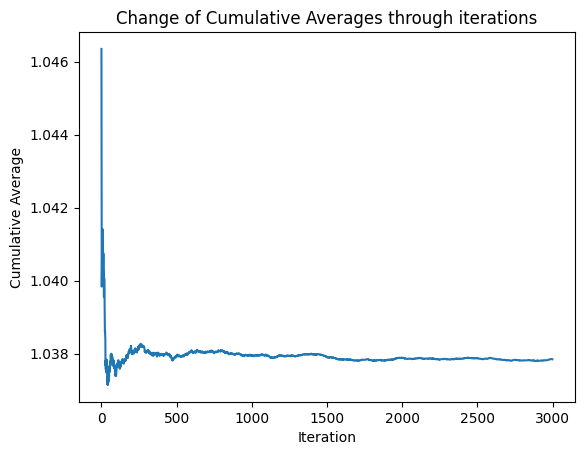

In [6]:
plt.title('Change of Cumulative Averages through iterations')
plt.ylabel('Cumulative Average')
plt.xlabel('Iteration')
plt.plot(range(R_max), cum_avg_norms)
plt.show()


---
<div style="text-align: right;">
Piotr Stachowicz  
 
337942
</div>